In [1]:
import pandas as pd
import matplotlib.pyplot as plt

votes = pd.read_csv("digg2009/digg_votes.csv", header = None)

print(votes.head())
print(len(votes))

            0     1  2
0  1246573330   318  1
1  1246603391   399  1
2  1246573479  1749  1
3  1246599553  1964  1
4  1246568035  4362  1
3018197


#### Digg_Votes
The `votes` table has the following columns:
 - 0: Unix time stamp of the vote
 - 1: Unique id of the voter
 - 2: Unique id of the story

In [2]:
#finding all votes for article 714 
print(votes[2].head())
votes_2 = votes[votes[2] == 714]

print(votes_2)
print(len(votes_2))

0    1
1    1
2    1
3    1
4    1
Name: 2, dtype: int64
                 0       1    2
616121  1246042182       6  714
616122  1245987593       8  714
616123  1245971575      10  714
616124  1246029005      27  714
616125  1245993138      47  714
...            ...     ...  ...
640215  1245972302  336170  714
640216  1245969094  336193  714
640217  1245972643  336200  714
640218  1246026579  336216  714
640219  1245995250  336224  714

[24099 rows x 3 columns]
24099


In [3]:
#sorting the timesteps 
votes_2 = votes_2.sort_values(by=[0])
print(len(votes_2))
print(votes_2.head())

24099
                 0       1    2
639992  1245966166  332346  714
635382  1245966217  266353  714
633072  1245966220  234047  714
617426  1245966232   16255  714
631543  1245966242  212449  714


In [4]:
#counting how many votes for each timestep
votes_2 = votes_2.groupby([0], as_index = False).count()
print(votes_2.head())
print(len(votes_2))

            0  1  2
0  1245966166  1  1
1  1245966217  1  1
2  1245966220  1  1
3  1245966232  1  1
4  1245966242  1  1
17664


In [5]:
import numpy as np
#converting timesteps to a np array 
timesteps = (votes_2.loc[:,0]).values
timesteps = np.concatenate(([1245966166], timesteps))
print(timesteps)

[1245966166 1245966166 1245966217 ... 1246770955 1246782800 1246782972]


In [6]:
normal_array = (timesteps- np.min(timesteps))/(np.max(timesteps) - np.min(timesteps))
print(normal_array)

[0.00000000e+00 0.00000000e+00 6.24383268e-05 ... 9.85287816e-01
 9.99789424e-01 1.00000000e+00]


In [7]:
voter_counts = (votes_2.loc[:,1]).values
print("Their indices are ", np.nonzero(voter_counts > 1))
print(voter_counts[31])
print(len(voter_counts))

Their indices are  (array([   31,    40,    60, ..., 17195, 17296, 17463]),)
2
17664


In [8]:
import numpy as np
y1_array = np.zeros(len(voter_counts)+1)
                   
for i in range(0, len(voter_counts)):
    #adding number of voters at each timestep
    y1_array[i+1] = y1_array[i] + voter_counts[i]
    
print(y1_array)

[0.0000e+00 1.0000e+00 2.0000e+00 ... 2.4097e+04 2.4098e+04 2.4099e+04]


In [12]:
y2_array = max(y1_array)-y1_array
print(y2_array)

print(len(y2_array))

[2.4099e+04 2.4098e+04 2.4097e+04 ... 2.0000e+00 1.0000e+00 0.0000e+00]
17665


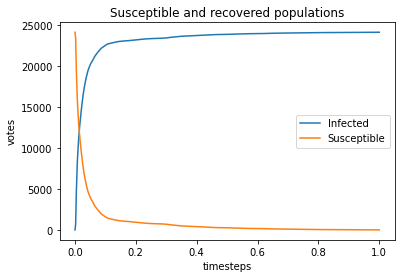

In [13]:
import matplotlib.pyplot as plt
# line 1 points
x1 = normal_array
y1 = y1_array
# plotting the line 1 points 
plt.plot(x1, y1, label = "Infected")
# line 2 points
x2 = normal_array
y2 = y2_array
# plotting the line 2 points 
plt.plot(x2, y2, label = "Susceptible")
plt.xlabel('timesteps')
# Set the y axis label of the current axis.
plt.ylabel('votes')
# Set a title of the current axes.
plt.title('Susceptible and recovered populations')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()